In [9]:

# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
## Bias files 
bias = pd.read_csv('data/scapis/MS_SCAPIS_BIAS_2025.txt', sep='\t')
## select column Label.ID to Request_beskrivningKI
selected_metadata = bias.loc[:, 'Label.ID': 'Request_beskrivningKI']


# Wrangling the columns 
# Remove row with NA in Label.ID
selected_metadata = selected_metadata.dropna(subset=['MS_Plate'])

selected_metadata['col'] = selected_metadata['Position'].str.extract('(\d+)').astype(int)
# Update row with Alphabet from Position 
selected_metadata['row'] = selected_metadata['Position'].str.extract('([A-Z])')

/tmp/ipykernel_32057/1350719499.py:2: DtypeWarning: Columns (3,7,113,145,151,154,179,305,344,371,384,475,527,528,756,762,768,781,819,1165,1177,1248) have mixed types. Specify dtype option on import or set low_memory=False.
  bias = pd.read_csv('data/scapis/MS_SCAPIS_BIAS_2025.txt', sep='\t')


In [38]:
unique_values = selected_metadata['MS_Plate'].unique()
print(f"Unique values in 'Random_plate': {unique_values}")

Unique values in 'Random_plate': ['Plate1' 'Plate2' 'Plate3' 'Plate4' 'Plate5' 'Plate6' 'Plate7' 'Plate8'
 'Plate9' 'Plate10' 'Plate11' 'Plate12' 'Plate13' 'Plate14']


/tmp/ipykernel_32057/108073768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate1['col'] = plate1['Position'].str.extract('(\d+)').astype(int)


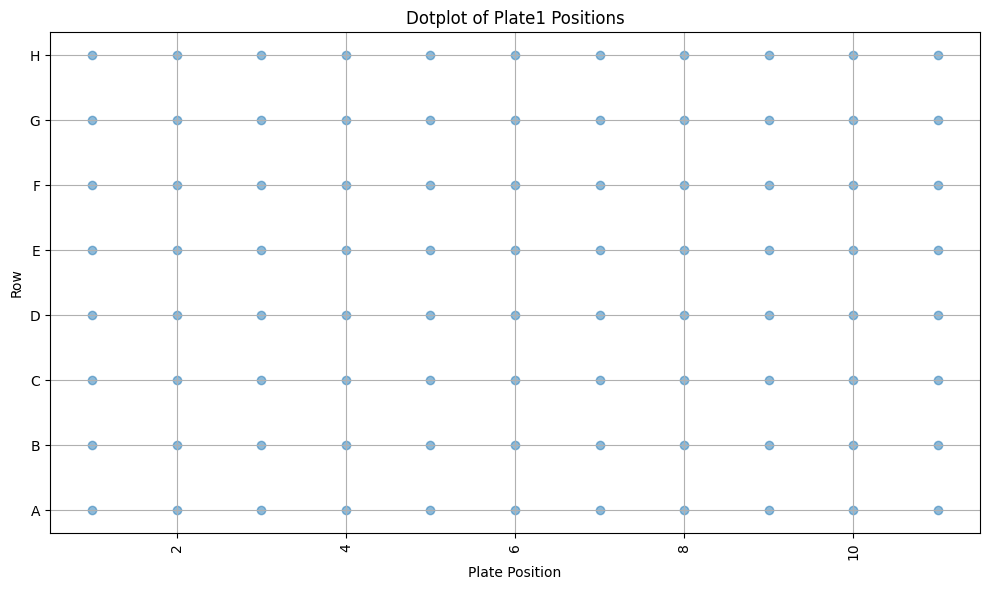

In [34]:
# filter plate 1
plate1 = selected_metadata[selected_metadata['Random_plate'] == "Plate1"]
# create col which is the number from Position 
plate1['col'] = plate1['Position'].str.extract('(\d+)').astype(int)
# Dotplot where x-axis is PlatePosition and y-axis is Row
plt.figure(figsize=(10, 6))
plt.scatter(plate1['col'], plate1['row'], alpha=0.5)
plt.title('Dotplot of Plate1 Positions')
plt.xlabel('Plate Position')
plt.ylabel('Row')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()